In [199]:
def nsqrt(x): # do not change the heading of the function
    
    low = 0
    mid = x // 2
    high = x
    
    while low <= high:
        if mid ** 2 > x:
            high = mid - 1
        elif mid ** 2 < x:
            low = mid + 1
        else:
            return mid
        mid = (high + low) // 2
    return mid

In [217]:
import submission as submission
print(submission.nsqrt(11), submission.nsqrt(1369))

3 37


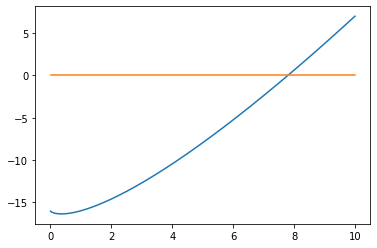

In [201]:
import math
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  


def f(x):
    return x * math.log(x) - 16.0

xvals = np.arange(0.01, 10, 0.01)        
yvals = np.array([f(x) for x in xvals])
plt.plot(xvals, yvals) 
plt.plot(xvals, 0*xvals)
plt.show()

In [202]:
def fprime(x):
    return 1.0 + math.log(x)

In [203]:
def find_root(f, fprime, x_0=1.0, EPSILON = 1E-7, MAX_ITER = 1000): # do not change the heading of the function
    iteration = 0
    num = []
    num.append(1.0)
    for i in range(1, 1001):
        temp = num[i - 1] - (f(num[i - 1]) / fprime(num[i - 1]))
        num.append(temp)
        if abs(num[i] - num[i - 1]) < EPSILON:
            break
    return num[-1]

In [218]:
import submission as submission

x = submission.find_root(f, fprime)
print(x)
print(f(x))

7.792741452820329
0.0


In [228]:
class Tree(object):
    def __init__(self, name='ROOT', children=None):
        self.name = name
        self.children = []
        if children is not None:
            for child in children:
                self.add_child(child)
    def __repr__(self):
        return self.name
    def add_child(self, node):
        assert isinstance(node, Tree)
        self.children.append(node)

In [229]:
t = Tree('*', [Tree('1'),
               Tree('2'),
               Tree('+', [Tree('3'),
                          Tree('4')])])

In [230]:
def print_tree(root, indent=0):
    print(' ' * indent, root)
    if len(root.children) > 0:
        for child in root.children:
            print_tree(child, indent+4)

In [208]:
print_tree(t)

 *
     1
     2
     +
         3
         4


In [209]:
import re

def myfind(s, char):
    pos = s.find(char)
    if pos == -1: # not found
        return len(s) + 1
    else: 
        return pos

def next_tok(s): # returns tok, rest_s
    if s == '': 
        return (None, None)
    # normal cases
    poss = [myfind(s, ' '), myfind(s, '['), myfind(s, ']')]
    min_pos = min(poss)
    if poss[0] == min_pos: # separator is a space
        tok, rest_s = s[ : min_pos], s[min_pos+1 : ] # skip the space
        if tok == '': # more than 1 space
            return next_tok(rest_s)
        else:
            return (tok, rest_s)
    else: # separator is a [ or ]
        tok, rest_s = s[ : min_pos], s[min_pos : ]
        if tok == '': # the next char is [ or ]
            return (rest_s[:1], rest_s[1:])
        else:
            return (tok, rest_s)
        
def str_to_tokens(str_tree):
    # remove \n first
    str_tree = str_tree.replace('\n','')
    out = []
    
    tok, s = next_tok(str_tree)
    while tok is not None:
        out.append(tok)
        tok, s = next_tok(s)
    return out

In [223]:
# format: node, list-of-children
str_tree = '''
1 [2 [3 4       5          ] 
   6 [7 8 [9]   10 [11 12] ] 
   13
  ]
'''
toks = str_to_tokens(str_tree)
print(toks)

['1', '[', '2', '[', '3', '4', '5', ']', '6', '[', '7', '8', '[', '9', ']', '10', '[', '11', '12', ']', ']', '13', ']']


In [311]:
def make_tree(tokens): # do not change the heading of the function
    if len(tokens) >= 0:
        parent = Tree(tokens[0])
        child = parent
        root = []
        for i in range(1, len(tokens)):
            if tokens[i].isdigit():
                child = Tree(tokens[i])
                parent.add_child(child)
            if tokens[i] == '[':
                parent = child
                root.append(parent)
            if tokens[i] == ']':
                if i < len(tokens) - 1:
                    root.pop()
                    parent = root.pop()
                    root.append(parent)
        return parent


In [321]:
import submission as submission
tt = make_tree(toks)
print_tree(tt)

 1
     2
         3
         4
         5
     6
         7
         8
             9
         10
             11
             12
     13


In [316]:
def max_depth(root): # do not change the heading of the function
    if root.children == None:
        return 1
    else:
        path = [1]
        for child in root.children:
            path.append(max_depth(child) + 1)
    return max(path)

In [319]:
import submission as submission
depth = max_depth(tt)
print(depth)

4


In [323]:
import requests